In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix


# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import the metrics class
from sklearn import metrics

import statsmodels.api as sm

# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#laod the dataset provided
salary_dataset  = pd.read_csv('train.csv')

# describe the dataset 
salary_dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
#laod the dataset provided
test_dataset  = pd.read_csv('test.csv')

# describe the dataset 
test_dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,38.576196,194150.017798,10.185762,728.913237,111.929922,41.121246
std,13.079061,104945.494349,2.477511,4355.969800,442.980441,12.397005
min,17.000000,21472.000000,1.000000,0.000000,0.000000,2.000000
25%,28.000000,120925.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,181434.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,243670.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,857532.000000,16.000000,99999.000000,2415.000000,99.000000


In [ ]:
# salary dataset info to find columns and count of the data 
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [ ]:
# salary dataset info to find columns and count of the data 
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [ ]:
#We count the number of missing values for each feature
salary_dataset.isnull().sum()
#below sum shows there are null values in the dataset so, need to clean the dataset dropna()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [ ]:
#We count the number of missing values for each feature
test_dataset.isnull().sum()
#below sum shows there are null values in the dataset so, need to clean the dataset dropna()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [ ]:
x = salary_dataset.dropna()
#salary_dataset.isnull().sum()

In [ ]:
x.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [ ]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(x)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [ ]:
#creating a Dataframe from the given dataset
df1 = pd.DataFrame(test_dataset)
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital','income_>50K':'income'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [ ]:
#replacing some special character columns names with proper names 
df1.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country'],
      dtype='object')

In [ ]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)
#we see that there is a special character as " ?" for columns workcalss, Occupation, and country
#we need to clean those data 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

In [ ]:
#Finding the special characters in the data frame 
df1.isin(['?']).sum(axis=0)
#we see that there is a special character as " ?" for columns workcalss, Occupation, and country
#we need to clean those data 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
dtype: int64

In [ ]:
#assinging the data set to a train data set to remove special characters
#train_data=[salary_dataset]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [ ]:
#assinging the data set to a train data set to remove special characters
#train_data=[salary_dataset]
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country'],
      dtype='object')

In [ ]:
# the code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [ ]:
# the code will replace the special character to nan and then drop the columns 
df1['country'] = df1['country'].replace('?',np.nan)
df1['workclass'] = df1['workclass'].replace('?',np.nan)
df1['occupation'] = df1['occupation'].replace('?',np.nan)

In [ ]:
#dropping the nan columns now 
df.dropna(how='any',inplace=True)

In [ ]:
#dropping the nan columns now 
df1.dropna(how='any',inplace=True)

In [ ]:
#Finding if special characters are present in the data 
df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

In [ ]:
#Finding if special characters are present in the data 
df1.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
dtype: int64

In [ ]:
#running a loop for value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
33    1165
36    1156
31    1151
35    1138
34    1116
      ... 
88       5
85       4
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             30057
Self-emp-not-inc     3404
Local-gov            2792
State-gov            1721
Self-emp-inc         1471
Federal-gov          1262
Without-pay            20
Name: workclass, dtype: int64
---- fnlwgt ---
203488    19
125892    18
126569    17
111567    16
120277    16
          ..
313930     1
152066     1
139863     1
84570      1
71683      1
Name: fnlwgt, Length: 24985, dtype: int64
---- education ---
HS-grad         13311
Some-college     8908
Bachelors        6811
Masters          2267
Assoc-voc        1740
11th             1481
Assoc-acdm       1360
10th             1098
7th-8th           740
Prof-school       706
9th               615
12th              520
Doctorate         489
5th-6th           413
1st-4th           202
Preschool          66
Name: education, dtype: int

In [ ]:
#running a loop for value_counts of each column to find out unique values. 
for c in df1.columns:
    print ("---- %s ---" % c)
    print (df1[c].value_counts())

---- age ---
25    39
30    34
36    31
45    29
31    29
      ..
69     1
74     1
75     1
80     1
90     1
Name: age, Length: 61, dtype: int64
---- workclass ---
Private             629
Self-emp-not-inc     85
Local-gov            68
Self-emp-inc         45
State-gov            43
Federal-gov          29
Name: workclass, dtype: int64
---- fnlwgt ---
123011    2
68330     2
113364    2
377018    2
231263    2
         ..
56648     1
302406    1
222532    1
48458     1
202752    1
Name: fnlwgt, Length: 878, dtype: int64
---- education ---
HS-grad         302
Some-college    198
Bachelors       142
Masters          61
11th             34
Assoc-acdm       33
Assoc-voc        33
10th             26
Prof-school      15
7th-8th          13
12th             12
Doctorate        10
9th              10
5th-6th           5
1st-4th           3
Preschool         2
Name: education, dtype: int64
---- educational-num ---
9     302
10    198
13    142
14     61
7      34
12     33
11     33
6      

In [ ]:
#checking the Special characters still exists 
df.workclass.value_counts()

Private             30057
Self-emp-not-inc     3404
Local-gov            2792
State-gov            1721
Self-emp-inc         1471
Federal-gov          1262
Without-pay            20
Name: workclass, dtype: int64

In [ ]:
#checking the Special characters still exists 
df1.workclass.value_counts()

Private             629
Self-emp-not-inc     85
Local-gov            68
Self-emp-inc         45
State-gov            43
Federal-gov          29
Name: workclass, dtype: int64

In [ ]:
#checking the Special characters still exists 
df.occupation.value_counts()

Craft-repair         5433
Exec-managerial      5415
Prof-specialty       5380
Adm-clerical         4944
Sales                4877
Other-service        4348
Machine-op-inspct    2663
Transport-moving     2085
Handlers-cleaners    1854
Farming-fishing      1338
Tech-support         1296
Protective-serv       867
Priv-house-serv       215
Armed-Forces           12
Name: occupation, dtype: int64

In [ ]:
#checking the Special characters still exists 
df1.occupation.value_counts()

Adm-clerical         128
Craft-repair         126
Prof-specialty       118
Sales                107
Exec-managerial      105
Other-service         86
Machine-op-inspct     71
Transport-moving      48
Protective-serv       28
Farming-fishing       28
Handlers-cleaners     26
Tech-support          23
Priv-house-serv        4
Armed-Forces           1
Name: occupation, dtype: int64

In [ ]:
#checking the Special characters still exists 
df.country.value_counts()

United-States                 37168
Mexico                          838
Philippines                     261
Germany                         176
Puerto-Rico                     159
Canada                          139
El-Salvador                     137
India                           130
Cuba                            120
China                           106
England                         102
Jamaica                          94
Dominican-Republic               91
South                            91
Italy                            89
Japan                            81
Guatemala                        77
Vietnam                          75
Columbia                         72
Poland                           66
Haiti                            65
Portugal                         55
Iran                             50
Taiwan                           49
Nicaragua                        45
Greece                           44
Ecuador                          40
Peru                        

In [ ]:
#checking the Special characters still exists 
df1.country.value_counts()

United-States         819
Mexico                 13
Poland                  8
Puerto-Rico             5
Canada                  4
El-Salvador             4
Jamaica                 3
Philippines             3
Nicaragua               3
Taiwan                  3
Columbia                3
Germany                 3
Italy                   3
Portugal                3
Cuba                    2
England                 2
South                   2
China                   2
Ecuador                 2
France                  2
India                   2
Trinadad&Tobago         1
Haiti                   1
Dominican-Republic      1
Thailand                1
Guatemala               1
Laos                    1
Greece                  1
Cambodia                1
Name: country, dtype: int64

In [ ]:
#dropping un-used data from the dataset 
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [ ]:
#dropping un-used data from the dataset 
df1.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [ ]:
# Let's see how many unique categories we have in this property
income = set(df['income'])
print(income)

{0, 1}


In [ ]:
#mapping the data into numerical data using map function
#df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [ ]:
#check the data is replaced 
df.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,1
1,Private,12th,Never-married,Other-service,Own-child,White,Male,0
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,1
3,State-gov,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0
4,State-gov,Some-college,Never-married,Other-service,Not-in-family,Black,Male,0


In [ ]:
#check the data is replaced 
df1.head()

,workclass,education,marital,occupation,relationship,race,gender
0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
1,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male
2,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Black,Male
3,Private,12th,Never-married,Handlers-cleaners,Own-child,White,Male
4,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male


In [ ]:
# Let's see how many unique categories we have in this gender property
gender = set(df['gender'])
print(gender)

{'Male', 'Female'}


In [ ]:
# Let's see how many unique categories we have in this gender property
gender1 = set(df1['gender'])
print(gender1)

{'Male', 'Female'}


In [ ]:
#Mapping the values to numerical values 
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [ ]:
#Mapping the values to numerical values 
df1['gender'] = df1['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [ ]:
# How many unique races we got here?
race = set(df['race'])
print(race)

{'Amer-Indian-Eskimo', 'Black', 'Other', 'White', 'Asian-Pac-Islander'}


In [ ]:
#Mapping the values to numerical values 
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [ ]:
#Mapping the values to numerical values 
df1['race'] = df1['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [ ]:
# How many unique races we got here?
Marital = set(df['marital'])
print(Marital)

{'Married-civ-spouse', 'Married-AF-spouse', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Divorced'}


In [ ]:
#Mapping the values to numerical values 
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [ ]:
#Mapping the values to numerical values 
df1['marital'] = df1['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [ ]:
# How many unique Workclass we got here?
emp = set(df['workclass'])
print(emp)

{'Self-emp-not-inc', 'Private', 'Self-emp-inc', 'Without-pay', 'Local-gov', 'Federal-gov', 'State-gov'}


In [ ]:
#Mapping the values to numerical values
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [ ]:
#Mapping the values to numerical values
df1['workclass'] = df1['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [ ]:
# How many unique Education we got here?
ed = set(df['education'])
print(ed)

{'Prof-school', '7th-8th', 'Preschool', 'Bachelors', 'Assoc-voc', '9th', 'Assoc-acdm', 'Doctorate', '12th', '10th', 'Some-college', 'Masters', 'HS-grad', '11th', '5th-6th', '1st-4th'}


In [ ]:
#Mapping the values to numerical values
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

In [ ]:
#Mapping the values to numerical values
df1['education'] = df1['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

In [ ]:
# Let's see how many unique categories we have in this Occupation property after cleaning it 
occupation = set(df['occupation'])
print(occupation)

{'Craft-repair', 'Other-service', 'Exec-managerial', 'Sales', 'Tech-support', 'Armed-Forces', 'Farming-fishing', 'Handlers-cleaners', 'Prof-specialty', 'Priv-house-serv', 'Transport-moving', 'Adm-clerical', 'Protective-serv', 'Machine-op-inspct'}


In [ ]:
# Now we classify them as numbers instead of their names.
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

In [ ]:
# Now we classify them as numbers instead of their names.
df1['occupation'] = df1['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

In [ ]:
# How many unique Relationship we got here?
relationship = set(df['relationship'])
print(relationship)

{'Other-relative', 'Wife', 'Not-in-family', 'Own-child', 'Husband', 'Unmarried'}


In [ ]:
#Mapping the values to numerical values
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

In [ ]:
#Mapping the values to numerical values
df1['relationship'] = df1['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

In [ ]:
#displaying the cleaned data to see if the map as worked
df.head(10)
#Now below we see all the data is numerical data that is proper for our data feature analysis 

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,10,4,7,0,3,0,1
1,5,5,5,13,5,3,0,0
2,5,12,2,7,4,3,0,1
3,1,6,2,11,4,3,0,0
4,1,0,5,13,0,0,0,0
5,1,3,5,3,5,3,0,0
6,5,15,2,6,1,3,1,0
7,6,12,2,10,4,3,0,0
8,5,3,5,4,0,3,0,0
9,5,3,2,7,4,3,0,1


In [ ]:
#displaying the cleaned data to see if the map as worked
df1.head(10)
#Now below we see all the data is numerical data that is proper for our data feature analysis 

,workclass,education,marital,occupation,relationship,race,gender
0,6,3,2,9,4,3,0
1,5,9,2,9,4,3,0
2,5,3,2,9,4,0,0
3,5,5,5,4,5,3,0
4,6,3,2,1,4,3,0
5,5,12,2,5,4,3,0
6,5,12,5,10,0,3,0
7,0,7,5,10,0,3,1
8,5,4,5,7,0,3,1
9,5,3,4,7,0,4,1


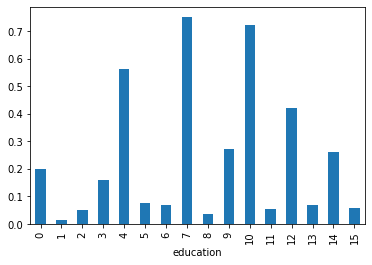

In [ ]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
df.groupby('education').income.mean().plot(kind='bar')

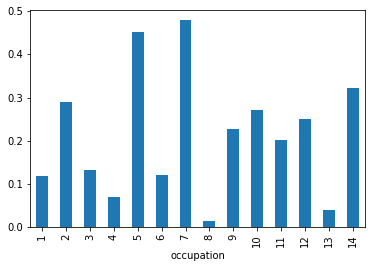

In [ ]:
#plotting a bar graph for Occupation against Income to see the co-relation between these columns 
df.groupby('occupation').income.mean().plot(kind='bar')

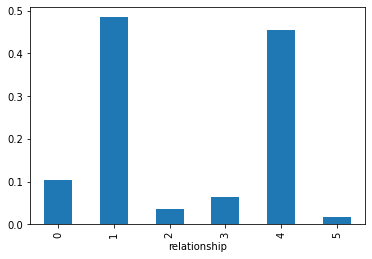

In [ ]:
#plotting a bar graph for Relationship against Income to see the co-relation between these columns 
df.groupby('relationship').income.mean().plot(kind='bar')

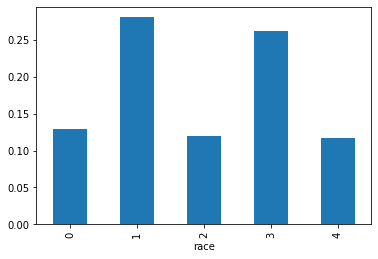

In [ ]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('race').income.mean().plot(kind='bar')

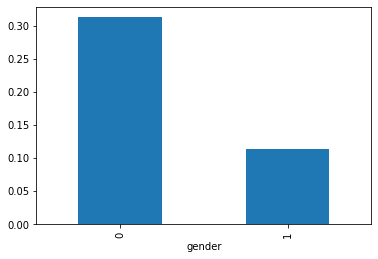

In [ ]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('gender').income.mean().plot(kind='bar')

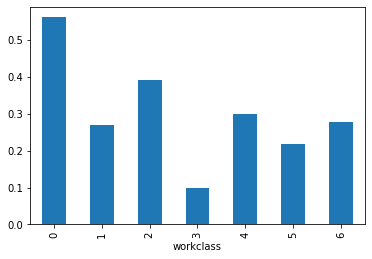

In [ ]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('workclass').income.mean().plot(kind='bar')

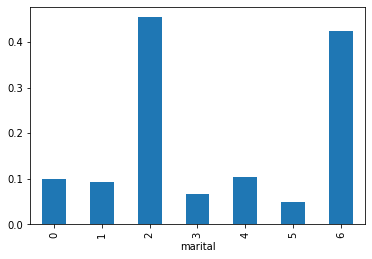

In [ ]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('marital').income.mean().plot(kind='bar')

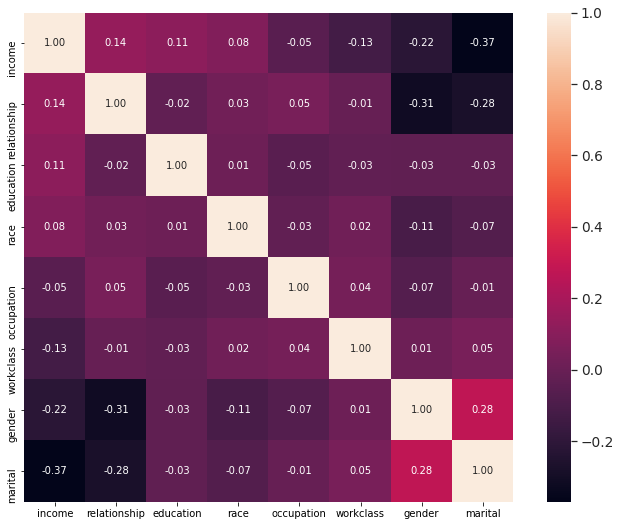

In [ ]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

#below we see that there is relation between Relationship, Education, Race, Occupation and Income which is our target 
#columns to predict so, doing more feature analysis on these columns 

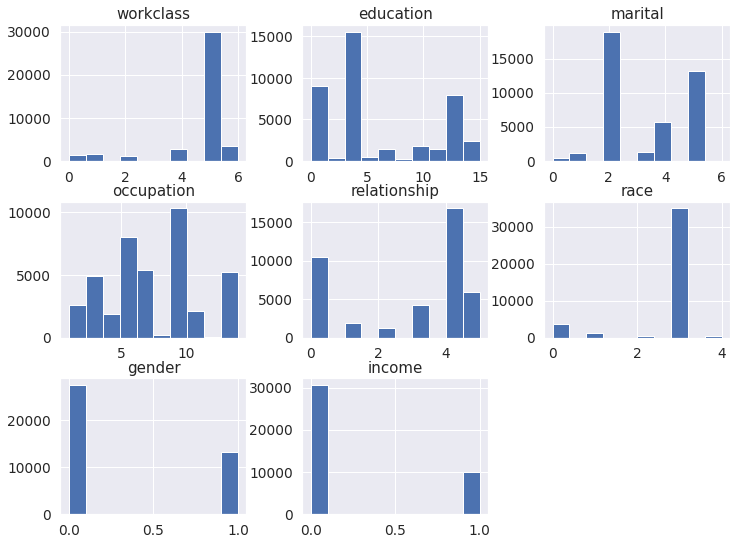

In [ ]:
# Plot histogram for each numeric variable/attribute of the dataset

df.hist(figsize=(12,9))
pplt.show()

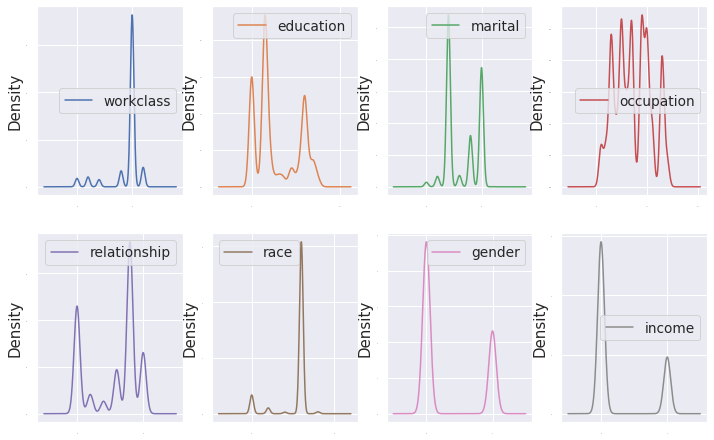

In [ ]:
# Density plots

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
pplt.show()

In [ ]:
df.columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'gender', 'income'],
      dtype='object')

In [ ]:
#Transform the data set into a data frame 
#NOTE: cleaned_data = the data we want, 
#      X axis = We concatenate the Relationship, Education,Race,Occupation columns using np.c_ provided by the numpy library
#      Y axis = Our target variable or the income of adult i.e Income
df_x = pd.DataFrame(df)
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], 
                    columns = ['relationship','education','race','occupation','gender','marital','workclass'])
df_y = pd.DataFrame(df.income)

In [ ]:
#Transform the data set into a data frame 
#NOTE: cleaned_data = the data we want, 
#      X axis = We concatenate the Relationship, Education,Race,Occupation columns using np.c_ provided by the numpy library
#      Y axis = Our target variable or the income of adult i.e Income
df1_x = pd.DataFrame(df1)
df1_x = pd.DataFrame(np.c_[df1['relationship'], df1['education'], df1['race'],df1['occupation'],df1['gender'],df1['marital'],df1['workclass']], 
                    columns = ['relationship','education','race','occupation','gender','marital','workclass'])


In [ ]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
#Train our model with the training data
reg.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27287, 7)
(13440, 7)
(27287, 1)
(13440, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#print our price predictions on our test data
y_pred = reg.predict(x_test)

In [ ]:
#print our price predictions on our test data
y1_pred = reg.predict(df1_x)

In [ ]:
y1_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Store dataframe values into a numpy array
array = df.values

# Separate array into input and output components by slicing
# For X (input) [:, 0:0] = all the rows, columns from 0 - 13
# Independent variables - input
X = array[:, 0:6]

# For Y (output) [:, 7] = all the rows, columns index 7 (last column)
# Dependent variable = output
Y = array[:,7]

In [ ]:
#df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']
reg.predict([[5,11,0,6,0,5,5]])

array([0])

In [ ]:
#Predicting the target value that is if income is <=50K then 0 if not 1 with x-axis columns as given below
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [ ]:
#Predicting the target value that is if income is <=50K then 0 if not 1 with x-axis columns as given below
reg.predict([[4,12,3,7,0,0,0]])

array([1])

In [ ]:
#confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10529,   703],
       [ 2874,   818]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7603189493433395


In [ ]:
# evaluate the algorithm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
kfold = KFold(n_splits, random_state=seed)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'
# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(reg,df_x,df_y, cv=kfold, scoring=scoring)
# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))     # Mean and Std of results

Accuracy: 0.755 (0.005)


In [ ]:
logit_model=sm.Logit(Y,df_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.464480
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.171     
Dependent Variable: y                AIC:              42023.4506
Date:               2020-05-14 21:02 BIC:              42084.4860
No. Observations:   45222            Log-Likelihood:   -21005.   
Df Model:           6                LL-Null:          -25322.   
Df Residuals:       45215            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
relationship      0.0495   0.0078   6.3760 0.0000  0.0343  0.0647
education         0.0619   0.0024  25.7859 0.0000  0.0572  0.0666
